In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [9]:
outs_dict = torch.load('inference_outs.pth')

outs_dict['superglue_correspondences'].shape, outs_dict['flownet_correspondences'].shape

((36, 4), (3000, 4))

(array([[460.,  71., 453.,  68.],
        [237.,  76., 229.,  75.],
        [499.,  88., 494.,  86.],
        [178.,  93., 170.,  93.],
        [526., 101., 519.,  98.],
        [187., 116., 179., 116.],
        [537., 116., 531., 115.],
        [202., 119., 196., 118.],
        [530., 131., 523., 129.],
        [214., 138., 205., 138.]], dtype=float32),
 256.0,
 416.0,
 array([[517.      , 166.      , 511.72537 , 164.76965 ],
        [535.      , 230.      , 529.86646 , 229.67738 ],
        [473.      , 128.      , 467.35144 , 126.413795],
        [471.      , 102.      , 464.9063  , 100.14423 ],
        [410.      , 180.      , 405.141   , 179.56435 ],
        [313.      ,  74.      , 305.68347 ,  72.517075],
        [588.      , 202.      , 582.6739  , 200.77643 ],
        [527.      , 239.      , 522.0786  , 238.89024 ],
        [448.      , 212.      , 443.1236  , 211.99756 ],
        [233.      , 109.      , 225.46977 , 108.456276]], dtype=float32),
 array([[404.,  40.],
        

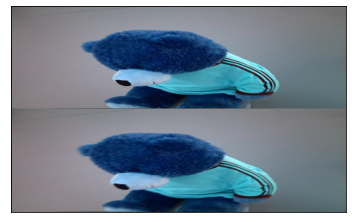

In [10]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
plt.imshow(cat_images, aspect='equal')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.savefig('input_pair.png')

superglue_correspondences = outs_dict['superglue_correspondences']
flownet_correspondences = outs_dict['flownet_correspondences']

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

superglue_correspondences[:10], h, w, flownet_correspondences[:10], outs_dict['keypoints'][0][:10]

SuperGlue keypoints and matches

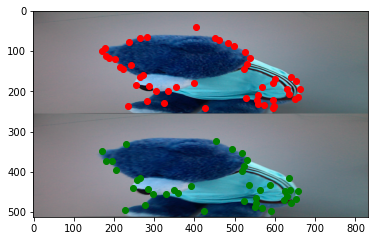

In [11]:
plt.imshow(cat_images, aspect='equal')
num_show = 150

keypoints = outs_dict['keypoints']

count = 0
for keypoint in keypoints[0]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1], 'o', color='red')
    count += 1
    
count = 0
for keypoint in keypoints[1]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1] + h, 'o', color='green')
    count += 1
    
plt.savefig('keypoint_out.png')

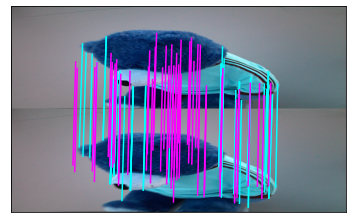

In [13]:
matches = 50
import random
plt.imshow(cat_images, aspect='equal')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)

for i in range(matches):
    idx = random.randint(0, superglue_correspondences.shape[0]-1)
    if abs(superglue_correspondences[idx][0] - superglue_correspondences[idx][2]) < 30:
        plt.plot([superglue_correspondences[idx][0], superglue_correspondences[idx][2]], [superglue_correspondences[idx][1], superglue_correspondences[idx][3] + h], color='cyan')

for i in range(matches):
    idx = random.randint(0, flownet_correspondences.shape[0]-1)
    if abs(flownet_correspondences[idx][0] - flownet_correspondences[idx][2]) < 30:
        plt.plot([flownet_correspondences[idx][0], flownet_correspondences[idx][2]], [flownet_correspondences[idx][1], flownet_correspondences[idx][3] + h], color='magenta')

plt.savefig('sampled_correspondence_out.png', dpi=100)